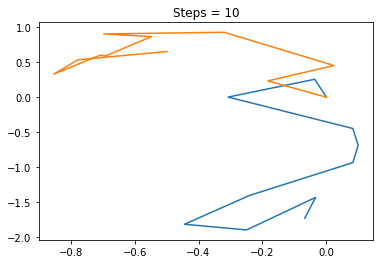

In [16]:
import random
import numpy as np
import matplotlib.pyplot as plt
from pylab import *

N = 11 # number of steps
w = 2 # number of walkers
noutput = 10 # determins number of graphs

# From stack exchange, create function which can calculate the angle between line and x-axis that we define

def angle_trunc(a):
    while a < 0.0:
        a += pi * 2
    return a

def AngleBtwPt(x_orig, y_orig, x_landmark, y_landmark):
    deltaY = y_landmark - y_orig
    deltaX = x_landmark - x_orig
    return angle_trunc(math.atan2(deltaY, deltaX))

# walker 1
w1 = [[0,0]]

# walker 2
w2 = [[0,0]]

# creating list of walkers
a = [w1,w2]

# angle list (one for each walker)
angles1 = []
angles2 = []


for iN in range(1,N):
    
    d1 = [np.random.random() - 0.5,np.random.random() - 0.5]
    w1.append([sum(steps1) for steps1 in zip(w1[-1],d1)])

    d2 = [np.random.random() - 0.5,np.random.random() - 0.5]
    w2.append([sum(steps2) for steps2 in zip(w2[-1],d2)])
    
    # removes "memory" of previous step angles
    
    angles1.clear()
    angles2.clear()
        
    for ik in range(1,iN): # ik = i check # for other avoidance # angles are being recalculated, so I might be able to decrease run time if I figure out how
        
        for it in range(ik + 2): # calculate angles and find the max and min for w1          
        
            theta1 = AngleBtwPt(w1[iN - 1][0],w1[iN - 1][1],w2[it][0],w2[it][1])
            angles1.append(theta1)
        
            dthetamax1 = np.max(angles1)
            dthetamin1 = np.min(angles1)
            
        if (dthetamax1 - dthetamin1) < np.pi:
            
            while dthetamin1 <= AngleBtwPt(w1[iN - 1][0],w1[iN - 1][1],w1[iN][0],w1[iN][1]) <= dthetamax1: # checks if w1 ran into w2

                w1.pop()

                d1 = [np.random.random() - 0.5,np.random.random() - 0.5]
                w1.append([sum(steps1) for steps1 in zip(w1[-1],d1)])
                
        else:
            
            while AngleBtwPt(w1[iN - 1][0],w1[iN - 1][1],w1[iN][0],w1[iN][1]) >= dthetamax1 or AngleBtwPt(w1[iN - 1][0],w1[iN - 1][1],w1[iN][0],w1[iN][1]) <= dthetamin1: # checks if w1 ran into w2

                w1.pop()

                d1 = [np.random.random() - 0.5,np.random.random() - 0.5]
                w1.append([sum(steps1) for steps1 in zip(w1[-1],d1)])
            
        for it in range(ik + 2): # calculate angles and find the max and min for w2
        
            theta2 = AngleBtwPt(w2[iN - 1][0],w2[iN - 1][1],w1[it][0],w1[it][1])
            angles2.append(theta2)
        
            dthetamax2 = np.max(angles2)
            dthetamin2 = np.min(angles2)
            
        if (dthetamax2 - dthetamin2) < np.pi:  

            while dthetamin2 <= AngleBtwPt(w2[iN - 1][0],w2[iN - 1][1],w2[iN][0],w2[iN][1]) <= dthetamax2: # checks if w2 ran into w1
            
                w2.pop()

                d2 = [np.random.random() - 0.5,np.random.random() - 0.5]
                w2.append([sum(steps2) for steps2 in zip(w2[-1],d2)])
                
        else:
            
            while AngleBtwPt(w2[iN - 1][0],w2[iN - 1][1],w2[iN][0],w2[iN][1]) >= dthetamax2 or AngleBtwPt(w2[iN - 1][0],w2[iN - 1][1],w2[iN][0],w2[iN][1]) <= dthetamin2: # checks if w2 ran into w1

                w2.pop()

                d2 = [np.random.random() - 0.5,np.random.random() - 0.5]
                w2.append([sum(steps2) for steps2 in zip(w2[-1],d2)])

#         for ic in range(1,iN - 1): # for self avoidance

#             while math.dist(w1[iN],w1[ic]) < rs: # checks if w1 ran into w1

#                 w1.pop()

#                 d1 = [np.random.random() - 0.5,np.random.random() - 0.5]
#                 w1.append([sum(steps1) for steps1 in zip(w1[-1],d1)])

#             while math.dist(w2[ic],w2[iN]) < rs: # checks if w2 ran into w2

#                 w2.pop()

#                 d2 = [np.random.random() - 0.5,np.random.random() - 0.5]
#                 w2.append([sum(steps2) for steps2 in zip(w2[-1],d2)])
                
    # plot the positions of both walkers
    x1, y1 = zip(*w1)
    x2, y2 = zip(*w2)
        
    if (mod(iN,noutput)==0):
        plt.plot(x1,y1)
        plt.plot(x2,y2)
        plt.title('Steps = ' + str(iN))
        plt.show()

In [104]:
w2

[[0, 0],
 [-0.06539191374730402, 0.12443434342093374],
 [0.4206356282283713, 0.5242144556373771],
 [0.16854785798818261, 0.09428904081564726],
 [0.21724884569550906, -0.13014835068075714]]

In [103]:
AngleBtwPt(w2[1][0],w2[1][1],w1[1][0],w1[1][1])

1.9402676136308397

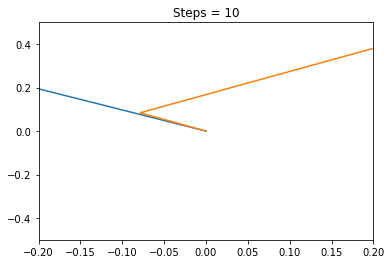

In [14]:
plt.plot(x1,y1)
plt.plot(x2,y2)
plt.title('Steps = ' + str(iN))
plt.xlim(-.2,.2)
plt.ylim(-.5,.5)
plt.show()